# Hierarchical Clustering Tutorial

Hierarchical Clustering is a method of unsupervised learning. 

Now, what is Unsuperivsed learning? Unsupervised learning is when there is no outcome variable to achieve which
means to draw inferences using all the independent variables but not the outcome or response variable.

One of the methods of Unsupervised learning is clustering. Clustering is majorly done by two ways. 1. K-means clustering 
2. Hierarchical clustering

Hierarchical Clustering caters to cluster same of type of objects together having different clusters for different objects 
based on their characterstics or the independent variables.

There are two types of hierarchical clustering.
1. Agglomerative Clustering
It is also called bottom up approach of hierarchical clustering. During every iteration, two clusters which are most similar
are added up to form the big cluster and so on. The scope if this tutorial is limited to Agglomerative clustering.

2. Divisive Clustering
This is also called top down approach. It is opposite to the Agglomerative Clustering. It starts with the root wherein all
the observations are included. It is then divided into two at each of the iteration.



In [125]:
##To perform all the functions of a hierarchical clustering, we need imports

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering as ac
import sklearn.metrics as sm
import numpy as np
import pandas as pd
import random
import csv

### AGGLOMERATIVE CLUSTERING

There are 4 methods used for hierarchical clustering which are discussed below.
1. Ward Method
2. Complete linkage
3. Average linkage
4. Single Linkage

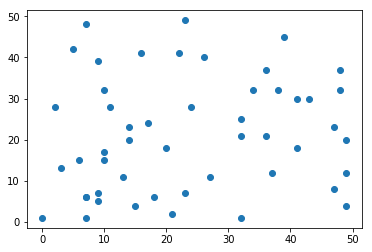

In [36]:
#Creating the random data for enhibiting hierarchical clustering

random = pd.DataFrame(np.random.randint(0,50,size=(50, 4)), columns=list('ABCD'))

#Now let us show a scatter plot to better understand the data

np.random.seed(1)   # seed set have the same plot each time
plt.scatter(random.A, random.C)
plt.show()

Z1 = linkage(random, 'ward')



What is dendrogram?

A dendrogram is a tree based diagram used to plot clusters. The individual leaves or the x-axis are the observations. The height of the branch which is the y-axis shows the distance of clusters from each other.

In order to form clusters from the dendrogram, we need to cut the dendrogram is value of y-axis depending upon the result
we want to achieve or the problem we are solving.

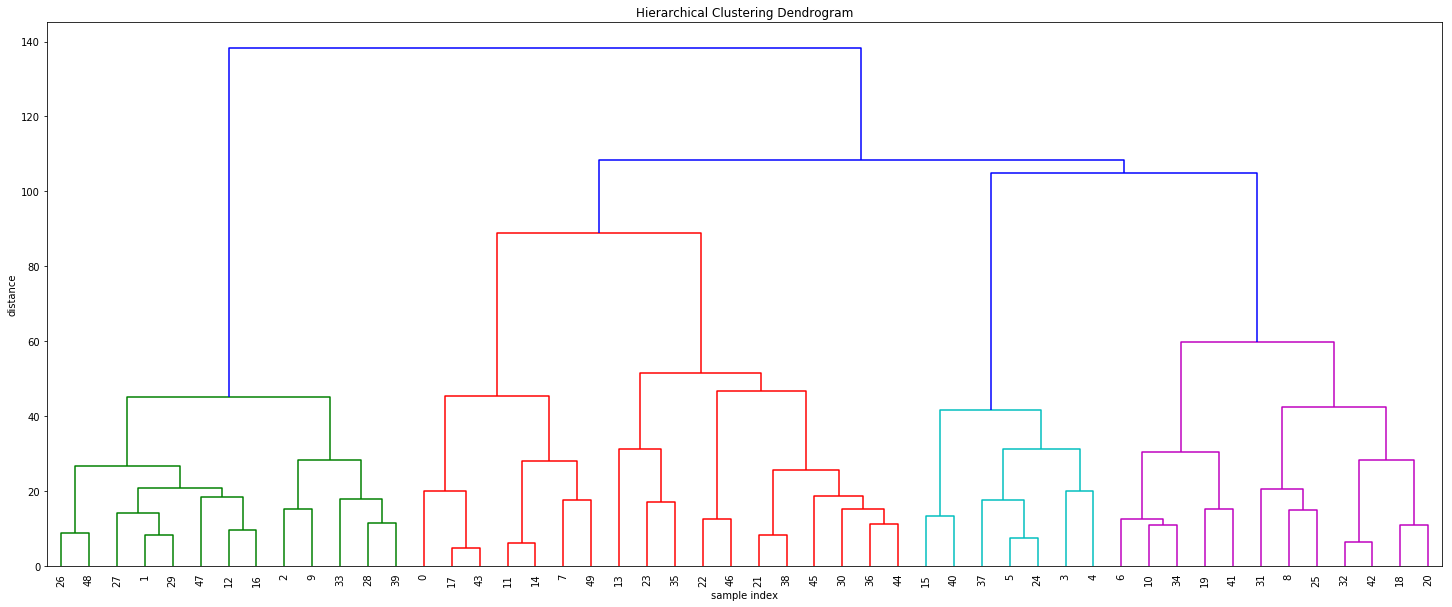

In [37]:
# Plotting Dendrogram

#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

Now, let us analyze what is happening here

What is Ward method?

1. Ward is a method to calculate distance between the newly formed clusters. 
2. This method minimizes the total within cluster variation. 
3. On each iteration, the algorithm tries to search for the cluster which will lead to a minimum increase in the variation
after merging
4. The objective function of this alorithm is the error sum of squares

Now, let us analyze the algorithm in detail

In [38]:
#First iteration

Z1[0]

array([ 17.        ,  43.        ,   4.79583152,   2.        ])

This means that clusters 17 and 43 are merged first which had a distance of 4.7 between them. 
This resulted in a cluster of 2 objects.

In [40]:
#Second iteration

Z1[1]

array([ 11.        ,  14.        ,   6.08276253,   2.        ])

This means that clusters 11 and 14 are merged second which had a distance of 6.08 between them. 
This resulted in a cluster of 2 objects.

In [41]:
#First 10 iterations

Z1[:10]

array([[ 17.        ,  43.        ,   4.79583152,   2.        ],
       [ 11.        ,  14.        ,   6.08276253,   2.        ],
       [ 32.        ,  42.        ,   6.40312424,   2.        ],
       [  5.        ,  24.        ,   7.61577311,   2.        ],
       [ 21.        ,  38.        ,   8.30662386,   2.        ],
       [  1.        ,  29.        ,   8.36660027,   2.        ],
       [ 26.        ,  48.        ,   8.77496439,   2.        ],
       [ 12.        ,  16.        ,   9.64365076,   2.        ],
       [ 10.        ,  34.        ,  10.86278049,   2.        ],
       [ 18.        ,  20.        ,  11.04536102,   2.        ]])

Similarly, the above matrix shows the first 10 iterations. We can observe that the distance is increasing monotonically.

In [55]:
#Second method

Z2 = linkage(random, 'single')

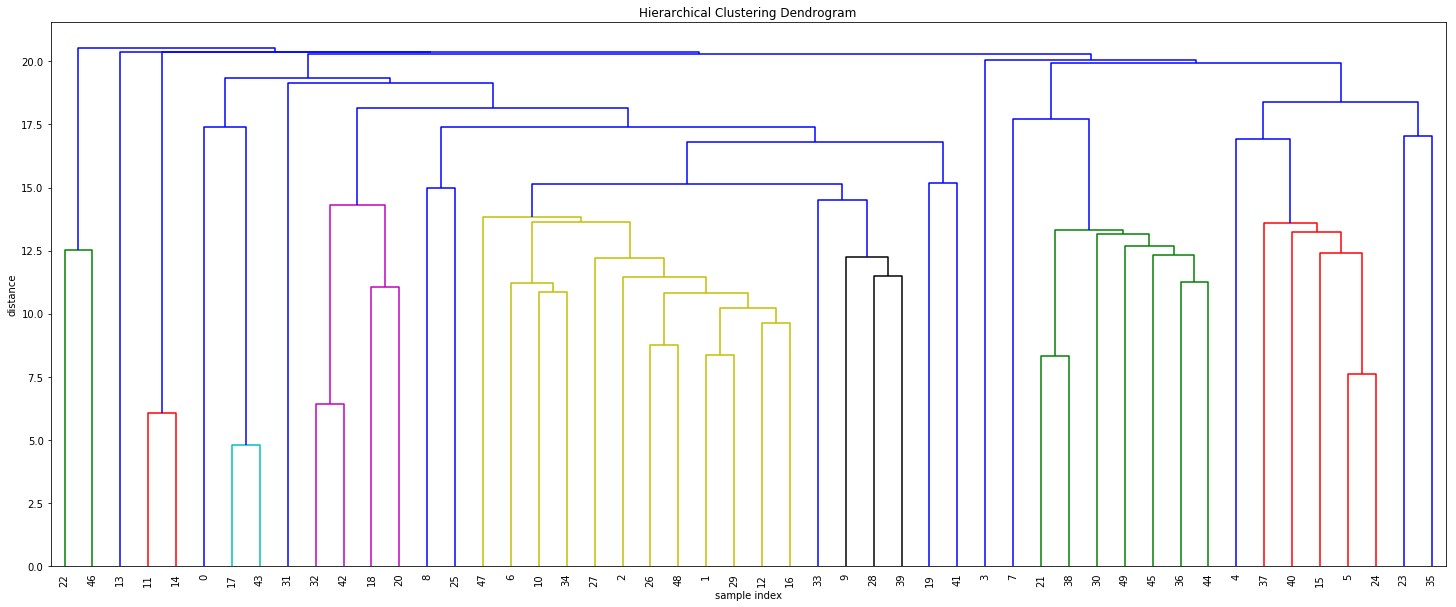

In [56]:
#Dendrogram plot

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

Now, let us analyze what is happening here.

What is single linkage?
It merges clusters in bottom-up manner. Initally, each observation has its own cluster. It checks the distance f two 
observations that are closest to each other and it is represented by a single distance. The two observations which has the
least amount of distance between themselves are merged.
The method repeats iteratively until all the observations are clustered in some clusters

In [57]:
#First iteration

Z2[0]

array([ 17.        ,  43.        ,   4.79583152,   2.        ])

In [58]:
#Second iteration

Z2[1]

array([ 11.        ,  14.        ,   6.08276253,   2.        ])

In [59]:
#First 10 terations

Z2[:10]

array([[ 17.        ,  43.        ,   4.79583152,   2.        ],
       [ 11.        ,  14.        ,   6.08276253,   2.        ],
       [ 32.        ,  42.        ,   6.40312424,   2.        ],
       [  5.        ,  24.        ,   7.61577311,   2.        ],
       [ 21.        ,  38.        ,   8.30662386,   2.        ],
       [  1.        ,  29.        ,   8.36660027,   2.        ],
       [ 26.        ,  48.        ,   8.77496439,   2.        ],
       [ 12.        ,  16.        ,   9.64365076,   2.        ],
       [ 55.        ,  57.        ,  10.24695077,   4.        ],
       [ 56.        ,  58.        ,  10.81665383,   6.        ]])

Single method also results in the same distance measures. The difference is only that the cluster formation is different from that of ward method. This is the reason that we are getting so many different colored lines and also the distance between each cluster is more than what we observed in ward method.

In [61]:
#Third method

Z3 = linkage(random, 'complete')

In [63]:
#First iteration

Z3[0]

array([ 17.        ,  43.        ,   4.79583152,   2.        ])

In [64]:
#Second iteration

Z3[1]

array([ 11.        ,  14.        ,   6.08276253,   2.        ])

In [65]:
#First 10 iteration

Z3[:10]

array([[ 17.        ,  43.        ,   4.79583152,   2.        ],
       [ 11.        ,  14.        ,   6.08276253,   2.        ],
       [ 32.        ,  42.        ,   6.40312424,   2.        ],
       [  5.        ,  24.        ,   7.61577311,   2.        ],
       [ 21.        ,  38.        ,   8.30662386,   2.        ],
       [  1.        ,  29.        ,   8.36660027,   2.        ],
       [ 26.        ,  48.        ,   8.77496439,   2.        ],
       [ 12.        ,  16.        ,   9.64365076,   2.        ],
       [ 10.        ,  34.        ,  10.86278049,   2.        ],
       [ 18.        ,  20.        ,  11.04536102,   2.        ]])

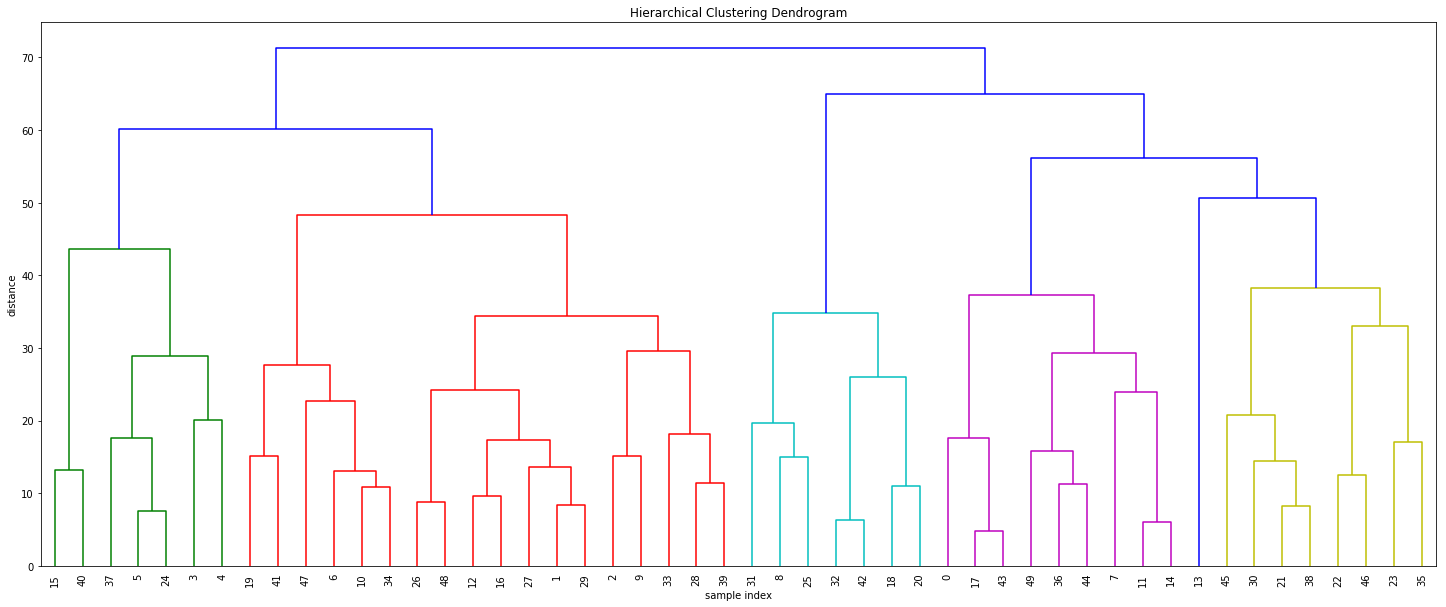

In [155]:
#Dendrogram plot

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z3,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

We can observe here that complete linkage results in more number of different clusters at the end as compared to ward method. We will observe later which works the best for the given problem below.

Now let us analyze what is happening here.

What is complete linkage?
In the complete linkage method, the distance between two clusters is the maximum distance i.e. the distance between the
elements that are farthest away. Therefore, it is the opposite of single linkage method.

In [66]:
#Fourth method

Z4 = linkage(random, 'average')

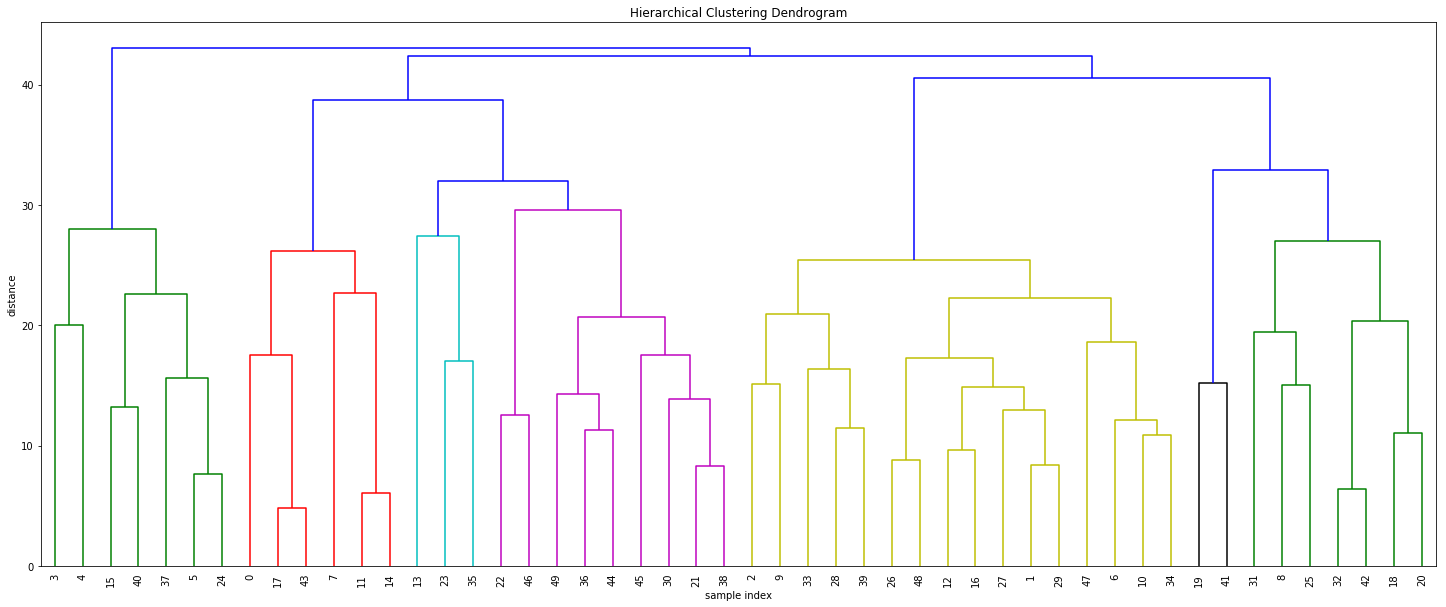

In [67]:
#Dendrogram plot

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z4,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

In [69]:
#First 10 iteration

Z4[:10]

array([[ 17.        ,  43.        ,   4.79583152,   2.        ],
       [ 11.        ,  14.        ,   6.08276253,   2.        ],
       [ 32.        ,  42.        ,   6.40312424,   2.        ],
       [  5.        ,  24.        ,   7.61577311,   2.        ],
       [ 21.        ,  38.        ,   8.30662386,   2.        ],
       [  1.        ,  29.        ,   8.36660027,   2.        ],
       [ 26.        ,  48.        ,   8.77496439,   2.        ],
       [ 12.        ,  16.        ,   9.64365076,   2.        ],
       [ 10.        ,  34.        ,  10.86278049,   2.        ],
       [ 18.        ,  20.        ,  11.04536102,   2.        ]])

Average clustering results in more number of clusters at the end as compared to complete method but less than single method.

Now let us analyze what is happening in average clustering.

What is average clustering?
Under this method, the distance between the clusters is the average of distances between all the observations of both the 
clusters. 

### Implementation on actual data

We have observed and learnt all the methods of agglomerative clustering. Now we will import and analyze the below dataset.
The dataset is for a cellular service provider company. The outcome variable in the data is Churn which is a binary variable.
1 represents that the customer has been churned
0 represents that the customer has not been churned

The other independent variables which will be used to run hierarchical clustering are:
    1. Revenue: The revenue earned by a customer per month
    2. Mou: Minutes of use
    3. Overage: Charges paid over the current plan
    4. Roam: Roaming charges
    5. Changem: Change in minutes usage as compared to last month
    6. Months: Since how many months a customer exists
    7. Uniqsubs: Unique subscriptions
    8. Activsubs: Number of active subscriptions
    9. Eqpdays: Number of days of the existing mobile phone
    10. Customer: Customer Id
    11. Creditde: Credit Rating
    12. Refurb: Refurbished phone or new
    13. Setprcm: Mailer Status
    14. Retcall: Previous Retention call

In [111]:
#Import the file

# Link to download the file: https://www.dropbox.com/h

users_data = pd.read_csv("cell2cell_version1.csv")

#Replace blank
users_data.fillna('',inplace=True)


### Snapshot of the data

In [112]:
users_data

,Revenue,Mou,Overage,Roam,Changem,Months,Uniqsubs,Actvsubs,Eqpdays,Customer,Creditde,Refurb,Setprcm,Retcall,Churn
0,38.000000,7.500000,0.000000,0.000000,-1.500000,60,1,1,1812,1000004,0,0,1,0,0
1,37.990000,71.000000,0.000000,0.000000,146.000000,53,1,1,1597,1000060,0,0,1,0,0
2,90.250000,951.500000,161.000000,0.000000,308.500000,54,1,1,1475,1000103,0,0,0,0,1
3,90.612500,1151.250000,21.500000,0.000000,224.750000,54,4,2,1599,1000107,0,0,0,0,1
4,30.000000,17.500000,0.000000,0.000000,-12.500000,55,1,1,1669,1000161,0,0,1,0,1
5,117.120000,489.500000,140.500000,0.000000,506.500000,51,6,2,279,1000183,0,0,0,1,1
6,44.960000,3584.250000,1094.250000,0.000000,-1037.250000,51,2,1,489,1000203,0,0,0,0,1
7,111.697500,143.250000,0.000000,0.000000,-36.250000,53,2,2,1592,1000214,0,0,1,0,1
8,29.990000,46.500000,0.000000,0.000000,20.500000,52,1,1,1441,1000294,0,0,0,1,1
9,10.000000,0.000000,0.000000,0.000000,0.000000,54,1,1,1636,1000298,0,0,1,1,1


In [121]:
#Splitting the data into X and Y since we will be using X for hierarchical clustering and Y for checking the accuracy

Y = users_data['Churn']
X = users_data.loc[:, users_data.columns != 'Churn']

#Below is some random data for basic hierarchical clustering

users_ward = linkage(X, 'ward')


In [122]:
#First 10 iterations

users_ward[:10]

array([[  996.        ,   998.        ,    12.72362468,     2.        ],
       [  208.        ,   209.        ,    21.52179128,     2.        ],
       [  999.        ,  1001.        ,    23.31307485,     2.        ],
       [  983.        ,   985.        ,    23.47338919,     2.        ],
       [  696.        ,   698.        ,    31.14404437,     2.        ],
       [  991.        ,   992.        ,    33.68001076,     2.        ],
       [  984.        ,   986.        ,    34.94225753,     2.        ],
       [ 1003.        ,  1004.        ,    36.21846905,     2.        ],
       [  397.        ,   398.        ,    37.98885104,     2.        ],
       [  119.        ,   120.        ,    38.64841653,     2.        ]])

Here we have applied the ward method of clustering. As shown above, observation 996 and 998 are first merged and so on.

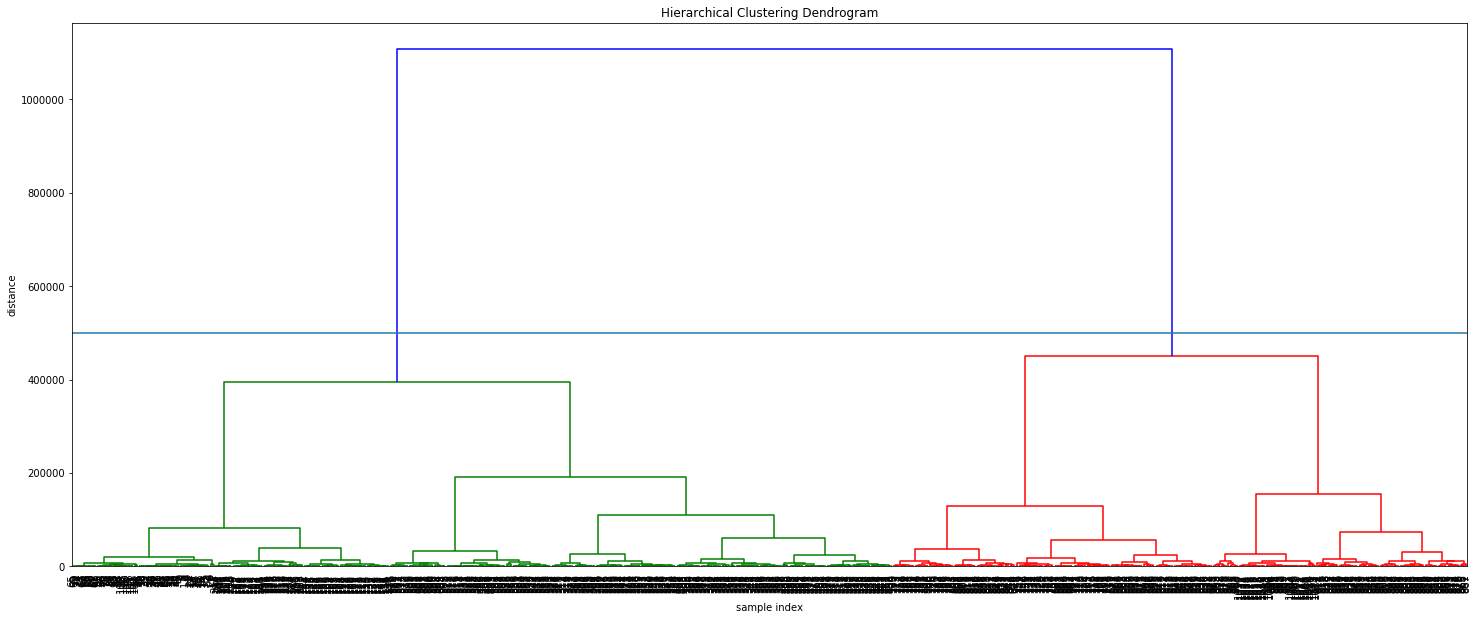

In [142]:
#Dendrogram plot

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    users_ward,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.# font size for the x axis labels
)
plt.axhline(y = 500000)
plt.show()

Here we can see that there are major two clusters and thereafter the clusters keep splitting. Since, there are 1036
observations, we are not able to see the numbers on the x-axis. We have cut the dendogram at height 500000. This is because
there are two categories of customers. Not only that, we tried finding the accuracy with different number of clusters below.
The cluster number 2 gave us the best results.

In [148]:
#Ward method and calculating accuracy with the outcome variable Y for cluster numbers 1 to 4

for i in range(1,5):
    Hierarchical_Cluster = ac(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    Hierarchical_Cluster.fit(X)
    print("Cluster",i,":",sm.accuracy_score(Y,Hierarchical_Cluster.labels_))

Cluster 1 : 0.30568948891
Cluster 2 : 0.512054001929
Cluster 3 : 0.314368370299
Cluster 4 : 0.24493731919


In [149]:
#Average method and calculating accuracy with the outcome variable Y for cluster numbers 1 to 4

for i in range(1,5):
    Hierarchical_Cluster = ac(n_clusters = i, affinity = 'euclidean', linkage = 'average')
    Hierarchical_Cluster.fit(X)
    print("Cluster",i,":",sm.accuracy_score(Y,Hierarchical_Cluster.labels_))

Cluster 1 : 0.30568948891
Cluster 2 : 0.419479267117
Cluster 3 : 0.360655737705
Cluster 4 : 0.255544840887


In [150]:
#Complete method and calculating accuracy with the outcome variable Y for cluster numbers 1 to 4

for i in range(1,5):
    Hierarchical_Cluster = ac(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
    Hierarchical_Cluster.fit(X)
    print("Cluster",i,":",sm.accuracy_score(Y,Hierarchical_Cluster.labels_))

Cluster 1 : 0.517839922854
Cluster 2 : 0.517839922854
Cluster 3 : 0.517839922854
Cluster 4 : 0.517839922854


In [151]:
#Complete method with different distance measure and calculating accuracy with the outcome variable Y 
#for cluster numbers 1 to 4

for i in range(1,5):
    Hierarchical_Cluster = ac(n_clusters = 2, affinity = 'manhattan', linkage = 'complete')
    Hierarchical_Cluster.fit(X)
    print("Cluster",i,":",sm.accuracy_score(Y,Hierarchical_Cluster.labels_))

Cluster 1 : 0.383799421408
Cluster 2 : 0.383799421408
Cluster 3 : 0.383799421408
Cluster 4 : 0.383799421408


As observed above, we can see that the complete linkage method showed that maximum accuracy of the hierarchical model.
We can also see that is it showing the same accuracy for all number of clusters. However, we chose 2 as the optimal number
of clusters because in other methods we are getting the maximum accuracy when k = 2.

The two clusters formed are based on the imdependent variables in the data. The algorithm tries to cluster the customers
with similar characterstics on the 14 independent variables together.

### Divisive Clustering

Under divisive clustering, initally all the observations are in one cluster. To break it into further clusters, diameter is
calculated for each cluster that is broken and the cluster with the maximum diameter is selected.